In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in your Google Drive
drive_csv_path = '/content/drive/My Drive/emotion.csv'

# Read CSV file into DataFrame
df = pd.read_csv(drive_csv_path)

# Display the first few rows of the DataFrame
print(df.head())


Mounted at /content/drive
          0         1         2         3         4         5         6  \
0  0.000000  0.000000  0.000000  0.000000  0.215820  0.438965  0.644531   
1  0.252930  0.376465  0.506836  0.520020  0.501465  0.501953  0.498535   
2  0.000000  0.000000  0.000000  0.005371  0.229492  0.452637  0.662109   
3  0.027344  0.045410  0.059570  0.051758  0.047852  0.056641  0.067383   
4  0.290039  0.423828  0.554199  0.598633  0.600586  0.675293  0.774902   

          7         8         9  ...      2367       2368      2369  \
0  0.878418  0.886719  0.808105  ... -0.177127  -0.282147 -0.357422   
1  0.481445  0.485840  0.481445  ... -0.147516  -1.872577  0.185195   
2  0.890137  0.890625  0.823730  ... -0.177126  -0.282147 -0.357422   
3  0.107910  0.162109  0.215332  ... -9.896303   4.484299 -1.093486   
4  0.613281  0.446777  0.237793  ... -7.343285  18.106377  6.983746   

        2370       2371      2372      2373      2374      2375  Emotions  
0  -0.399968  -0.408

In [1]:



from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in your Google Drive
drive_csv_path = '/content/drive/My Drive/emotions_wonoiseUPD.csv'

# Read CSV file into DataFrame
df = pd.read_csv(drive_csv_path)

# Display the first few rows of the DataFrame
print(df.head())


Mounted at /content/drive
          0         1         2         3         4         5         6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000977  0.005371   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000977  0.005371   
2  0.004395  0.004883  0.004883  0.001953  0.006836  0.015137  0.025391   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.020996  0.046875  0.061523  ...  1.445391  0.328134  1.743512 -2.562575   
1  0.020996  0.046875  0.061523  ...  1.445391  0.328140  1.743517 -2.562577   
2  0.034668  0.062500  0.069824  ...  2.482418  0.526144 -3.485873 -0.455059   
3  0.000000  0.000000  0.000000  ...       NaN       NaN       NaN       NaN   
4  0.000000  0.000000  0.000000  ...       NaN       NaN       NaN       NaN   

       2371      2372      2373      2374 

In [2]:
Emotions=df

In [3]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [4]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(33603, 2377)

In [5]:
import numpy as np
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [6]:

#Data Prep

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [7]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)
X.shape

(33603, 7)


(33603, 2376)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26882, 2376), (26882, 7), (6721, 2376), (6721, 7))

In [9]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [10]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26882, 2376), (26882, 7), (6721, 2376), (6721, 7))

In [11]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((26882, 2376, 1), (26882, 7), (6721, 2376, 1), (6721, 7))

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [13]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [14]:
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=2, padding='same'),

    tf.keras.layers.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),

    tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=2, padding='same'),

    tf.keras.layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),

    tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),

    tf.keras.layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),

    tf.keras.layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [17]:
history=model.fit(x_traincnn, y_train, epochs=25, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/25
421/421 [==============================] - ETA: 0s - loss: 1.4788 - accuracy: 0.4412

421/421 [==============================] - 143s 339ms/step - loss: 1.4788 - accuracy: 0.4412 - val_loss: 2.0019 - val_accuracy: 0.2674 - lr: 0.0010
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


420/421 [============================>.] - ETA: 0s - loss: 1.1414 - accuracy: 0.5536

421/421 [==============================] - 146s 346ms/step - loss: 1.1414 - accuracy: 0.5536 - val_loss: 1.0791 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 3/25
420/421 [============================>.] - ETA: 0s - loss: 1.0255 - accuracy: 0.5998

421/421 [==============================] - 146s 347ms/step - loss: 1.0256 - accuracy: 0.5998 - val_loss: 0.9521 - val_accuracy: 0.6242 - lr: 0.0010
Epoch 4/25
420/421 [============================>.] - ETA: 0s - loss: 0.9549 - accuracy: 0.6279

421/421 [==============================] - 144s 342ms/step - loss: 0.9549 - accuracy: 0.6279 - val_loss: 1.5386 - val_accuracy: 0.4452 - lr: 0.0010
Epoch 5/25
420/421 [============================>.] - ETA: 0s - loss: 0.9594 - accuracy: 0.6294

421/421 [==============================] - 145s 345ms/step - loss: 0.9594 - accuracy: 0.6293 - val_loss: 1.1039 - val_accuracy: 0.5713 - lr: 0.0010
Epoch 6/25
420/421 [============================>.] - ETA: 0s - loss: 0.8412 - accuracy: 0.6757

421/421 [==============================] - 145s 346ms/step - loss: 0.8414 - accuracy: 0.6757 - val_loss: 0.8988 - val_accuracy: 0.6548 - lr: 0.0010
Epoch 7/25
420/421 [============================>.] - ETA: 0s - loss: 0.7883 - accuracy: 0.6952

421/421 [==============================] - 145s 345ms/step - loss: 0.7883 - accuracy: 0.6952 - val_loss: 0.8138 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 8/25
420/421 [============================>.] - ETA: 0s - loss: 0.7159 - accuracy: 0.7267

421/421 [==============================] - 145s 345ms/step - loss: 0.7161 - accuracy: 0.7267 - val_loss: 1.2113 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 9/25
420/421 [============================>.] - ETA: 0s - loss: 0.8162 - accuracy: 0.6867

421/421 [==============================] - 144s 341ms/step - loss: 0.8164 - accuracy: 0.6866 - val_loss: 0.7886 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 10/25
420/421 [============================>.] - ETA: 0s - loss: 0.6425 - accuracy: 0.7584

421/421 [==============================] - 144s 341ms/step - loss: 0.6426 - accuracy: 0.7583 - val_loss: 0.6633 - val_accuracy: 0.7535 - lr: 0.0010
Epoch 11/25
420/421 [============================>.] - ETA: 0s - loss: 0.6012 - accuracy: 0.7740

421/421 [==============================] - 145s 344ms/step - loss: 0.6013 - accuracy: 0.7740 - val_loss: 0.6551 - val_accuracy: 0.7575 - lr: 0.0010
Epoch 12/25
420/421 [============================>.] - ETA: 0s - loss: 0.5593 - accuracy: 0.7918

421/421 [==============================] - 144s 342ms/step - loss: 0.5593 - accuracy: 0.7918 - val_loss: 0.6699 - val_accuracy: 0.7508 - lr: 0.0010
Epoch 13/25
420/421 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7932

421/421 [==============================] - 144s 341ms/step - loss: 0.5529 - accuracy: 0.7932 - val_loss: 0.5525 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 14/25
420/421 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8364

421/421 [==============================] - 145s 344ms/step - loss: 0.4472 - accuracy: 0.8364 - val_loss: 0.4793 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 15/25
420/421 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8592

421/421 [==============================] - 144s 343ms/step - loss: 0.3841 - accuracy: 0.8591 - val_loss: 0.4546 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 16/25
420/421 [============================>.] - ETA: 0s - loss: 0.3272 - accuracy: 0.8817

421/421 [==============================] - 145s 344ms/step - loss: 0.3273 - accuracy: 0.8817 - val_loss: 0.5665 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 17/25
420/421 [============================>.] - ETA: 0s - loss: 0.4089 - accuracy: 0.8507

421/421 [==============================] - 144s 341ms/step - loss: 0.4090 - accuracy: 0.8507 - val_loss: 0.3672 - val_accuracy: 0.8784 - lr: 0.0010
Epoch 18/25
420/421 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8999

421/421 [==============================] - 145s 343ms/step - loss: 0.2779 - accuracy: 0.8999 - val_loss: 0.4780 - val_accuracy: 0.8308 - lr: 0.0010
Epoch 19/25
420/421 [============================>.] - ETA: 0s - loss: 0.3082 - accuracy: 0.8927

421/421 [==============================] - 143s 340ms/step - loss: 0.3082 - accuracy: 0.8928 - val_loss: 0.3634 - val_accuracy: 0.8731 - lr: 0.0010
Epoch 20/25
420/421 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9067

421/421 [==============================] - 143s 340ms/step - loss: 0.2601 - accuracy: 0.9066 - val_loss: 0.3607 - val_accuracy: 0.8737 - lr: 0.0010
Epoch 21/25
420/421 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.9065

421/421 [==============================] - 145s 345ms/step - loss: 0.2656 - accuracy: 0.9065 - val_loss: 0.3048 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 22/25
420/421 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9320

421/421 [==============================] - 144s 342ms/step - loss: 0.1967 - accuracy: 0.9320 - val_loss: 0.3047 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 23/25
420/421 [============================>.] - ETA: 0s - loss: 0.1746 - accuracy: 0.9387

421/421 [==============================] - 144s 342ms/step - loss: 0.1748 - accuracy: 0.9386 - val_loss: 0.2944 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 24/25
420/421 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9240

421/421 [==============================] - 144s 341ms/step - loss: 0.2196 - accuracy: 0.9240 - val_loss: 0.3374 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 25/25
420/421 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.9356

421/421 [==============================] - 144s 341ms/step - loss: 0.1800 - accuracy: 0.9356 - val_loss: 0.2363 - val_accuracy: 0.9269 - lr: 0.0010


211/211 [==============================] - 11s 47ms/step - loss: 0.2363 - accuracy: 0.9269
Accuracy of our model on test data :  92.69453883171082 %


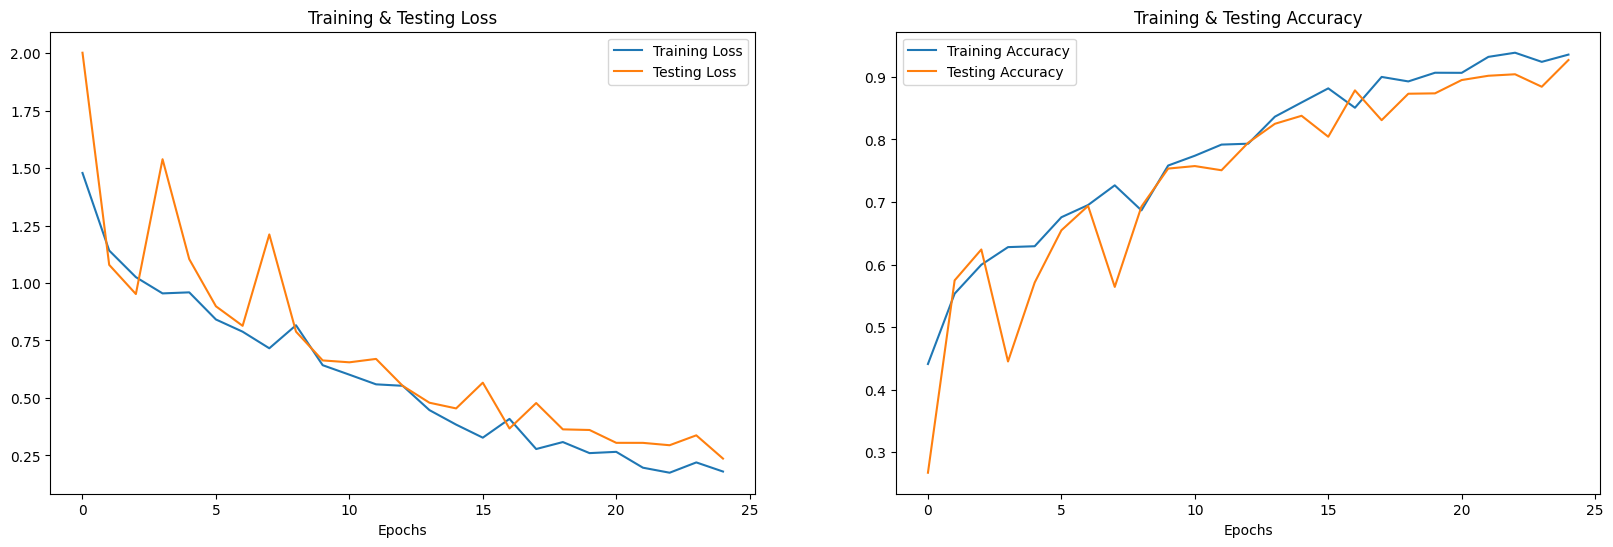

In [18]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [19]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

211/211 [==============================] - 10s 47ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,happy,happy
4,happy,happy
5,neutral,neutral
6,neutral,neutral
7,happy,happy
8,fear,fear
9,disgust,disgust


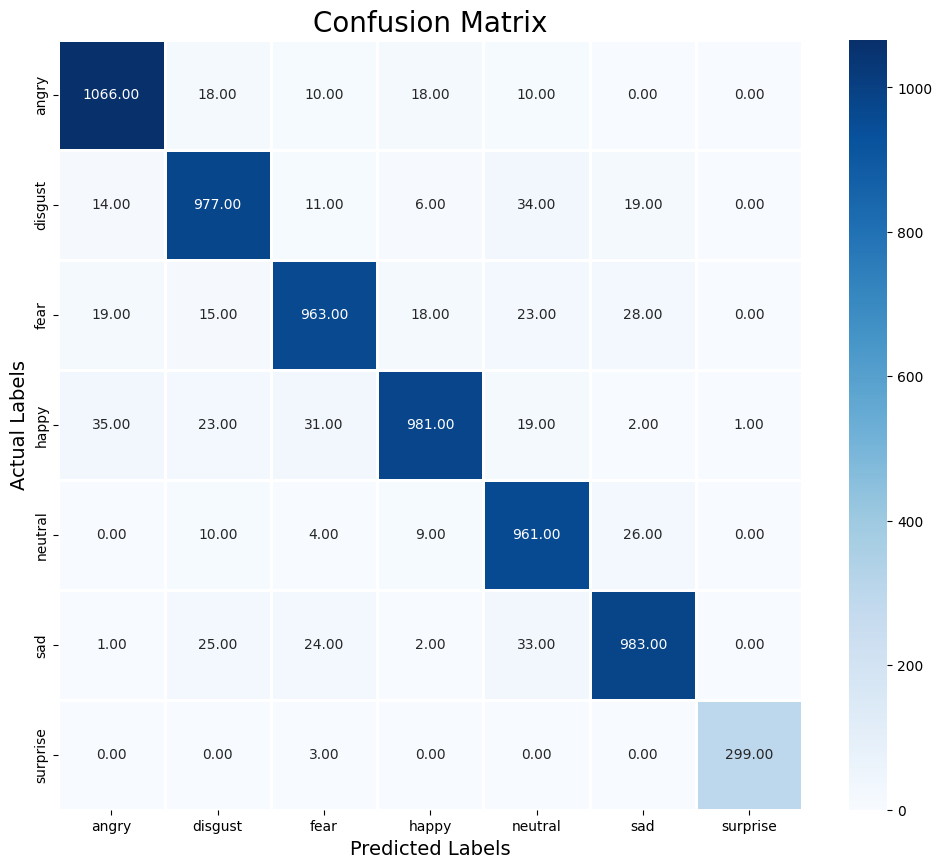

              precision    recall  f1-score   support

       angry       0.94      0.95      0.94      1122
     disgust       0.91      0.92      0.92      1061
        fear       0.92      0.90      0.91      1066
       happy       0.95      0.90      0.92      1092
     neutral       0.89      0.95      0.92      1010
         sad       0.93      0.92      0.92      1068
    surprise       1.00      0.99      0.99       302

    accuracy                           0.93      6721
   macro avg       0.93      0.93      0.93      6721
weighted avg       0.93      0.93      0.93      6721



In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [21]:

from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model_WOnoise.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights_WOnoise.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model_WOnoise.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/CNN_model_weights_WOnoise.h5")
print("Loaded model from disk")

Loaded model from disk


In [23]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

211/211 [==============================] - 11s 47ms/step - loss: 0.2363 - accuracy: 0.9269
accuracy: 92.69%


In [24]:
import pickle

#Without noise
# Saving scaler
with open('scalerWOn.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scalerWOn.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoderWon.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoderWon.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done
